In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

# Pretty printing
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 50)

PROJECT_ROOT = Path("..").resolve()
OUT_DIR = PROJECT_ROOT / "outputs"

results_path = OUT_DIR / "real_results_with_ppi.csv"
results_path

PosixPath('/shared/crollo/drug-disease-hypothesis/outputs/real_results_with_ppi.csv')

In [2]:
df = pd.read_csv(results_path)
df.shape, df.columns

((40175481, 11),
 Index(['drug_id', 'disease_id', 'mean_distance', 'proximity_score',
        'n_overlap', 'overlapping_genes', 'jaccard', 'norm_overlap',
        'combined_score', 'drug_name', 'disease_name'],
       dtype='object'))

In [3]:
drugs = pd.read_csv("../data/real/drugs.csv")[["drug_id", "drug_name"]]
diseases = pd.read_csv("../data/real/diseases.csv")[["disease_id", "disease_name"]]

df = df.drop(columns=["drug_name", "disease_name"], errors="ignore")
df = df.merge(drugs, on="drug_id", how="left")
df = df.merge(diseases, on="disease_id", how="left")

In [4]:
df.head()

,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name
0,CHEMBL5653589,EFO_0000616,2.410611,0.293203,127,ENSG00000008394;ENSG00000026025;ENSG0000004874...,0.016404,1.000000,1.092943,CHEMBL5653589,neoplasm
1,CHEMBL5653589,EFO_0005772,2.464717,0.288624,121,ENSG00000005156;ENSG00000012983;ENSG0000005280...,0.016571,0.952756,1.039448,CHEMBL5653589,neurodegenerative disease
2,CHEMBL5653589,EFO_0000182,2.369101,0.296815,87,ENSG00000026025;ENSG00000048740;ENSG0000005074...,0.016530,0.685039,0.780119,CHEMBL5653589,hepatocellular carcinoma
3,CHEMBL5653589,MONDO_0004992,2.359552,0.297659,82,ENSG00000026025;ENSG00000048740;ENSG0000005074...,0.017447,0.645669,0.741519,CHEMBL5653589,cancer
4,CHEMBL5653589,MONDO_0007254,2.372358,0.296528,79,ENSG00000005156;ENSG00000026025;ENSG0000004874...,0.016826,0.622047,0.716259,CHEMBL5653589,breast cancer


# First exploration

In [5]:
summary_cols = ["n_overlap", "mean_distance", "proximity_score", "combined_score"]
df[summary_cols].describe()

,n_overlap,mean_distance,proximity_score,combined_score
count,4.017548e+07,4.017548e+07,4.017548e+07,4.017548e+07
mean,1.118181e+00,1.987057e+00,3.434942e-01,1.584221e-01
std,4.948193e-01,4.125778e-01,6.967774e-02,8.936171e-02
min,1.000000e+00,0.000000e+00,2.207792e-01,0.000000e+00
25%,1.000000e+00,1.753623e+00,3.034319e-01,1.069509e-01
50%,1.000000e+00,2.000000e+00,3.333333e-01,1.444444e-01
75%,1.000000e+00,2.295632e+00,3.631579e-01,1.833333e-01
max,1.270000e+02,3.529412e+00,1.000000e+00,1.092943e+00


## Distributions (histograms)

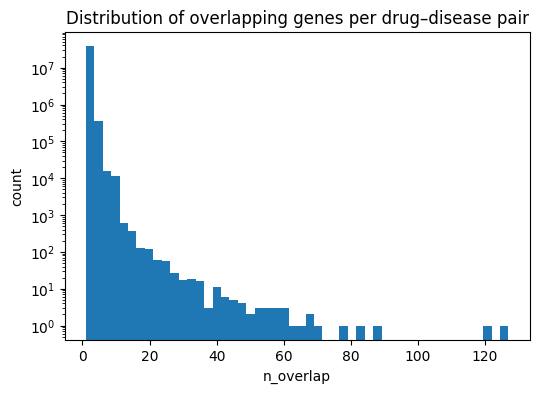

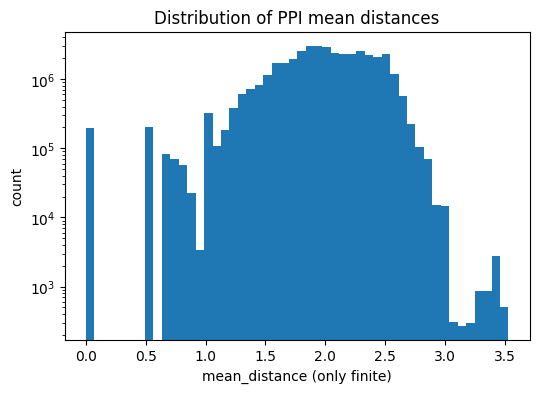

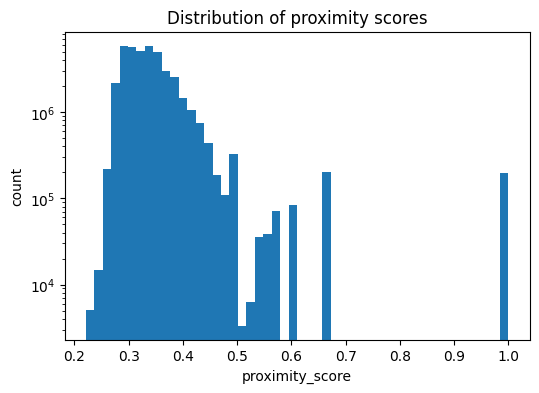

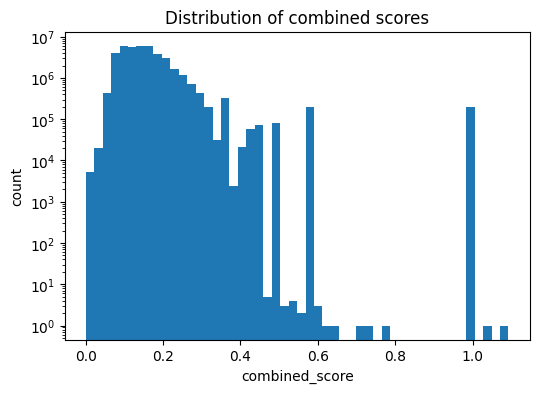

In [6]:
plt.figure(figsize=(6, 4))
df["n_overlap"].plot(kind="hist", bins=50)
plt.xlabel("n_overlap")
plt.ylabel("count")
plt.title("Distribution of overlapping genes per drug–disease pair")
plt.yscale('log')
plt.show()

plt.figure(figsize=(6, 4))
# Filter out inf distances
finite_md = df.loc[np.isfinite(df["mean_distance"]), "mean_distance"]
finite_md.plot(kind="hist", bins=50)
plt.xlabel("mean_distance (only finite)")
plt.ylabel("count")
plt.title("Distribution of PPI mean distances")
plt.yscale('log')
plt.show()

plt.figure(figsize=(6, 4))
df["proximity_score"].plot(kind="hist", bins=50)
plt.xlabel("proximity_score")
plt.ylabel("count")
plt.title("Distribution of proximity scores")
plt.yscale('log')
plt.show()

plt.figure(figsize=(6, 4))
df["combined_score"].plot(kind="hist", bins=50)
plt.xlabel("combined_score")
plt.ylabel("count")
plt.title("Distribution of combined scores")
plt.yscale('log')
plt.show()

## How much does PPI change the ranking?

In [7]:
# Top by overlap
top_overlap = df.sort_values("n_overlap", ascending=False)
top_overlap.head(10)

,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name
0,CHEMBL5653589,EFO_0000616,2.410611,0.293203,127,ENSG00000008394;ENSG00000026025;ENSG0000004874...,0.016404,1.000000,1.092943,CHEMBL5653589,neoplasm
1,CHEMBL5653589,EFO_0005772,2.464717,0.288624,121,ENSG00000005156;ENSG00000012983;ENSG0000005280...,0.016571,0.952756,1.039448,CHEMBL5653589,neurodegenerative disease
2,CHEMBL5653589,EFO_0000182,2.369101,0.296815,87,ENSG00000026025;ENSG00000048740;ENSG0000005074...,0.016530,0.685039,0.780119,CHEMBL5653589,hepatocellular carcinoma
3,CHEMBL5653589,MONDO_0004992,2.359552,0.297659,82,ENSG00000026025;ENSG00000048740;ENSG0000005074...,0.017447,0.645669,0.741519,CHEMBL5653589,cancer
4,CHEMBL5653589,MONDO_0007254,2.372358,0.296528,79,ENSG00000005156;ENSG00000026025;ENSG0000004874...,0.016826,0.622047,0.716259,CHEMBL5653589,breast cancer
5,CHEMBL3752910,EFO_0000616,2.356936,0.297891,70,ENSG00000026025;ENSG00000050748;ENSG0000007778...,0.009067,0.551181,0.646579,CHEMBL3752910,neoplasm
6,CHEMBL3752910,EFO_0005772,2.411129,0.293158,67,ENSG00000012983;ENSG00000034693;ENSG0000003592...,0.009207,0.527559,0.616696,CHEMBL3752910,neurodegenerative disease
7,CHEMBL5653589,EFO_0004612,2.518187,0.284237,67,ENSG00000005156;ENSG00000008394;ENSG0000002602...,0.011174,0.527559,0.605247,CHEMBL5653589,high density lipoprotein cholesterol measurement
8,CHEMBL5653589,EFO_0000571,2.363069,0.297347,64,ENSG00000026025;ENSG00000050748;ENSG0000005725...,0.016020,0.503937,0.598263,CHEMBL5653589,lung adenocarcinoma
9,CHEMBL5653589,EFO_1001951,2.363028,0.297351,63,ENSG00000026025;ENSG00000057252;ENSG0000006271...,0.017041,0.496063,0.590331,CHEMBL5653589,colorectal carcinoma


In [8]:
# Top by combined score
top_combined = df.sort_values("combined_score", ascending=False)
top_combined.head(10)

,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name
0,CHEMBL5653589,EFO_0000616,2.410611,0.293203,127,ENSG00000008394;ENSG00000026025;ENSG0000004874...,0.016404,1.000000,1.092943,CHEMBL5653589,neoplasm
1,CHEMBL5653589,EFO_0005772,2.464717,0.288624,121,ENSG00000005156;ENSG00000012983;ENSG0000005280...,0.016571,0.952756,1.039448,CHEMBL5653589,neurodegenerative disease
19953804,CHEMBL3701280,MONDO_0015337,0.000000,1.000000,1,ENSG00000066468,1.000000,0.007874,1.000000,CHEMBL3701280,isolated craniosynostosis
19953808,CHEMBL3701280,MONDO_0015704,0.000000,1.000000,1,ENSG00000066468,1.000000,0.007874,1.000000,CHEMBL3701280,familial scaphocephaly syndrome
36679469,CHEMBL5925544,EFO_1001289,0.000000,1.000000,1,ENSG00000105835,1.000000,0.007874,1.000000,CHEMBL5925544,"Cholecystitis, Acute"
36679802,CHEMBL5925572,EFO_1001289,0.000000,1.000000,1,ENSG00000105835,1.000000,0.007874,1.000000,CHEMBL5925572,"Cholecystitis, Acute"
39929260,CHEMBL81747,MONDO_0013521,0.000000,1.000000,1,ENSG00000164362,1.000000,0.007874,1.000000,CHEMBL81747,"dyskeratosis congenita, autosomal dominant 2"
11942816,CHEMBL2048702,MONDO_0013128,0.000000,1.000000,1,ENSG00000143839,1.000000,0.007874,1.000000,CHEMBL2048702,familial juvenile hyperuricemic nephropathy ty...
11942723,CHEMBL2048701,MONDO_0013128,0.000000,1.000000,1,ENSG00000143839,1.000000,0.007874,1.000000,CHEMBL2048701,familial juvenile hyperuricemic nephropathy ty...
39929296,CHEMBL81747,MONDO_0027353,0.000000,1.000000,1,ENSG00000164362,1.000000,0.007874,1.000000,CHEMBL81747,autosomal recessive dyskeratosis congenita 4


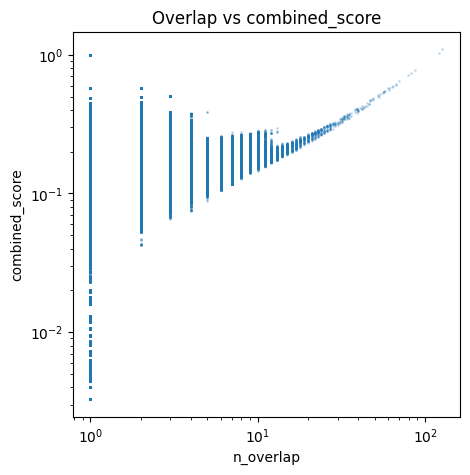

In [9]:
plt.figure(figsize=(5, 5))
plt.scatter(df["n_overlap"], df["combined_score"], s=1, alpha=0.2)
plt.xlabel("n_overlap")
plt.ylabel("combined_score")
plt.title("Overlap vs combined_score")
plt.yscale('log')
plt.xscale('log')
plt.show()

## Per-drug and per-disease views

In [10]:
# Pick a drug of interest: either manually or from top_combined
drug_example = top_combined.iloc[0]["drug_id"]
drug_example, top_combined.iloc[0]["drug_name"]

('CHEMBL5653589', 'CHEMBL5653589')

In [11]:
disease_example = top_combined.iloc[0]["disease_id"]
disease_example, top_combined.iloc[0]["disease_name"]

('EFO_0000616', 'neoplasm')

In [12]:
df_dis = df[df["disease_id"] == disease_example].copy()
df_dis_sorted = df_dis.sort_values("combined_score", ascending=False).head(20)
df_dis_sorted

,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name
0,CHEMBL5653589,EFO_0000616,2.410611,0.293203,127,ENSG00000008394;ENSG00000026025;ENSG0000004874...,0.016404,1.000000,1.092943,CHEMBL5653589,neoplasm
5,CHEMBL3752910,EFO_0000616,2.356936,0.297891,70,ENSG00000026025;ENSG00000050748;ENSG0000007778...,0.009067,0.551181,0.646579,CHEMBL3752910,neoplasm
26,CHEMBL388978,EFO_0000616,2.363790,0.297284,47,ENSG00000006062;ENSG00000006432;ENSG0000001156...,0.006117,0.370079,0.463260,STAUROSPORINE,neoplasm
49,CHEMBL603469,EFO_0000616,2.351010,0.298417,39,ENSG00000006432;ENSG00000011566;ENSG0000005074...,0.005076,0.307087,0.401223,LESTAURTINIB,neoplasm
53,CHEMBL4097778,EFO_0000616,2.308440,0.302257,36,ENSG00000006062;ENSG00000006432;ENSG0000005074...,0.004689,0.283465,0.382341,TP-030n,neoplasm
...,...,...,...,...,...,...,...,...,...,...,...
112,CHEMBL1232461,EFO_0000616,2.357360,0.297853,27,ENSG00000005381;ENSG00000058272;ENSG0000006795...,0.003511,0.212598,0.305261,MOLIBRESIB,neoplasm
117,CHEMBL475251,EFO_0000616,2.358542,0.297748,27,ENSG00000006432;ENSG00000011566;ENSG0000005074...,0.003517,0.212598,0.305126,R-406,neoplasm
155,CHEMBL477772,EFO_0000616,2.391967,0.294814,25,ENSG00000006432;ENSG00000011566;ENSG0000005074...,0.003258,0.196850,0.285488,PAZOPANIB,neoplasm
162,CHEMBL608533,EFO_0000616,2.394205,0.294620,25,ENSG00000006432;ENSG00000011566;ENSG0000005074...,0.003256,0.196850,0.285238,MIDOSTAURIN,neoplasm


## Inspect overlapping genes for a single pair

In [13]:
pair = top_combined.iloc[0]
pair[["drug_id", "drug_name", "disease_id", "disease_name", "n_overlap", "mean_distance", "proximity_score", "combined_score"]]

drug_id            CHEMBL5653589
drug_name          CHEMBL5653589
disease_id           EFO_0000616
disease_name            neoplasm
n_overlap                    127
mean_distance           2.410611
proximity_score         0.293203
combined_score          1.092943
Name: 0, dtype: object

In [14]:
overlap_str = pair["overlapping_genes"]
overlap_genes = overlap_str.split(";") if isinstance(overlap_str, str) else []
overlap_genes[:20], len(overlap_genes)

(['ENSG00000008394',
  'ENSG00000026025',
  'ENSG00000048740',
  'ENSG00000050748',
  'ENSG00000057252',
  'ENSG00000060491',
  'ENSG00000062716',
  'ENSG00000064651',
  'ENSG00000065534',
  'ENSG00000071054',
  'ENSG00000075415',
  'ENSG00000077782',
  'ENSG00000082175',
  'ENSG00000087586',
  'ENSG00000091436',
  'ENSG00000092820',
  'ENSG00000092853',
  'ENSG00000094631',
  'ENSG00000095015',
  'ENSG00000096696'],
 127)

In [15]:
genes_df = pd.read_csv(PROJECT_ROOT / "data/real/genes.csv")
genes_df.head()

,gene_id,symbol
0,ENSG00000000003,ENSG00000000003
1,ENSG00000000005,ENSG00000000005
2,ENSG00000000419,ENSG00000000419
3,ENSG00000000457,ENSG00000000457
4,ENSG00000000460,ENSG00000000460


## Visualize PPI neighborhood for the overlapping genes

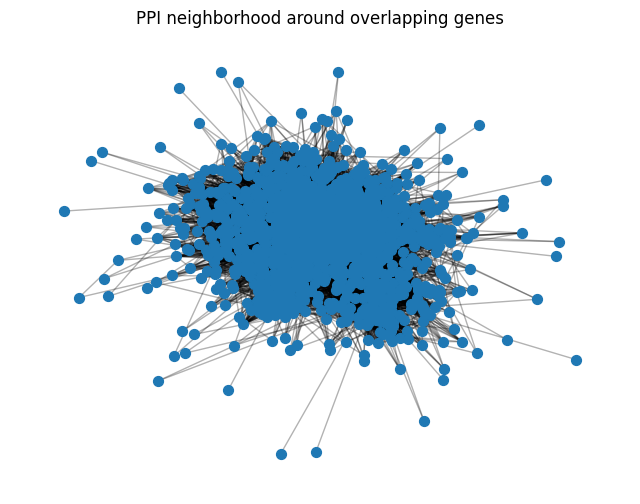

In [16]:
import networkx as nx

ppi_df = pd.read_csv(PROJECT_ROOT / "data/real/ppi.csv")
G = nx.from_pandas_edgelist(ppi_df, "gene1_id", "gene2_id")

# Take a small neighborhood around overlapping genes
seed_genes = [g for g in overlap_genes if g in G][:10]  # limit for sanity
neighbors = set(seed_genes)
for g in seed_genes:
    neighbors |= set(nx.neighbors(G, g))

subG = G.subgraph(neighbors)

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(subG, k=0.3, iterations=50)

nx.draw_networkx_nodes(subG, pos, node_size=50)
nx.draw_networkx_edges(subG, pos, alpha=0.3)

# Highlight overlapping genes
nx.draw_networkx_nodes(
    subG, pos,
    nodelist=seed_genes,
    node_size=1,
)

plt.axis("off")
plt.title("PPI neighborhood around overlapping genes")
plt.show()

## Save a smaller “top hits” table for manual review

In [17]:
top_hits = df.sort_values("combined_score", ascending=False).head(500)

top_hits[[
    "drug_id", "drug_name",
    "disease_id", "disease_name",
    "n_overlap", "overlapping_genes",
    "mean_distance", "proximity_score",
    "combined_score"
]].to_csv(OUT_DIR / "real_results_top500.csv", index=False)

# Drug Indication

In [18]:
known = pd.read_csv("../data/real/known_indications.csv")
known.head(), known.shape

(        drug_id  disease_id
 0  CHEMBL265502  DOID_10113
 1  CHEMBL413376  DOID_10113
 2   CHEMBL52440  DOID_10113
 3     CHEMBL655  DOID_10113
 4     CHEMBL830  DOID_10113,
 (42970, 2))

In [19]:
# df already loaded earlier as real_results_with_ppi + enriched names

known_pairs = (
    known[["drug_id", "disease_id"]]
    .drop_duplicates()
)

known_pairs["label"] = 1

df_labeled = df.merge(
    known_pairs,
    on=["drug_id", "disease_id"],
    how="left"
)

df_labeled["label"] = df_labeled["label"].fillna(0).astype(int)

df_labeled["label"].value_counts()


label
0    40166997
1        8484
Name: count, dtype: int64

In [20]:
df_labeled = df_labeled.sort_values("combined_score", ascending=False).reset_index(drop=True)
df_labeled["rank"] = df_labeled.index + 1

total_known = int(df_labeled["label"].sum())
total_pairs = len(df_labeled)
print("Total known:", total_known, "Total pairs:", total_pairs)

for K in [100, 1000, 10000, 100000]:
    topK = df_labeled.iloc[:K]
    hits = int(topK["label"].sum())
    print(f"Top {K:>7}: {hits} known indications "
          f"({hits/total_known*100 if total_known>0 else 0:.2f}% of all known; "
          f"{hits/K*100:.2f}% of top-K are known)")


Total known: 8484 Total pairs: 40175481
Top     100: 0 known indications (0.00% of all known; 0.00% of top-K are known)
Top    1000: 0 known indications (0.00% of all known; 0.00% of top-K are known)
Top   10000: 0 known indications (0.00% of all known; 0.00% of top-K are known)
Top  100000: 2 known indications (0.02% of all known; 0.00% of top-K are known)


In [21]:
from sklearn.metrics import roc_auc_score

pos = df_labeled[df_labeled["label"] == 1]
neg = df_labeled[df_labeled["label"] == 0].sample(
    n=min(len(pos) * 10, 500_000),  # up to 10x positives, cap at 500k
    random_state=0
)

eval_df = pd.concat([pos, neg], ignore_index=True)

auc = roc_auc_score(eval_df["label"], eval_df["combined_score"])
auc

0.4484656991411406

# MoA

In [22]:
import pandas as pd

df_moa = pd.read_csv("../data/real/moa_pairs_ensembl.csv")
df_moa.shape, df_moa.head()

((13896, 2),
          drug_id          gene_id
 0  CHEMBL1551724  ENSG00000162409
 1  CHEMBL1551724  ENSG00000131791
 2  CHEMBL1551724  ENSG00000181929
 3  CHEMBL1551724  ENSG00000106617
 4  CHEMBL1551724  ENSG00000111725)

In [23]:
moa_drug_stats = (
    df_moa.groupby("drug_id")["gene_id"]
    .nunique()
    .reset_index(name="n_moa_targets")
)

moa_drug_stats.head()

,drug_id,n_moa_targets
0,CHEMBL1000,1
1,CHEMBL100116,1
2,CHEMBL1002,1
3,CHEMBL1004,1
4,CHEMBL1005,1


# Logistic regression to learn better scoring function

In [24]:
import numpy as np
import pandas as pd

# Ensure these columns exist; adjust names if needed
feature_cols = []

if "n_overlap" in df_labeled.columns:
    feature_cols.append("n_overlap")
if "jaccard" in df_labeled.columns:
    feature_cols.append("jaccard")
if "proximity_score" in df_labeled.columns:
    feature_cols.append("proximity_score")
if "mean_distance" in df_labeled.columns:
    # use inverse distance as a feature (more intuitive)
    df_labeled["inv_mean_distance"] = np.where(
        np.isfinite(df_labeled["mean_distance"]),
        1.0 / (1.0 + df_labeled["mean_distance"]),
        0.0,
    )
    feature_cols.append("inv_mean_distance")

feature_cols

['n_overlap', 'jaccard', 'proximity_score', 'inv_mean_distance']

In [25]:
eval_df = df_labeled[feature_cols + ["label"]].copy()
eval_df.head(), eval_df["label"].value_counts()

(   n_overlap   jaccard  proximity_score  inv_mean_distance  label
 0        127  0.016404         0.293203           0.293203      0
 1        121  0.016571         0.288624           0.288624      0
 2          1  1.000000         1.000000           1.000000      0
 3          1  1.000000         1.000000           1.000000      0
 4          1  1.000000         1.000000           1.000000      0,
 label
 0    40166997
 1        8484
 Name: count, dtype: int64)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression

# Build sample as before
pos = eval_df[eval_df["label"] == 1]
neg = eval_df[eval_df["label"] == 0].sample(
    n=min(len(pos) * 10, 500_000),
    random_state=42
)

sample_df = pd.concat([pos, neg], ignore_index=True)

X = sample_df[feature_cols].values
y = sample_df["label"].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0,
    stratify=y
)

clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
)
clf.fit(X_train, y_train)

train_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
test_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])

train_auc, test_auc

(0.7453422538544912, 0.7548548550551155)

In [27]:
# Retrain on full sample (optional)
clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
)
clf.fit(X, y)  # full sample

X_all = df_labeled[feature_cols].values
df_labeled["ml_score"] = clf.predict_proba(X_all)[:, 1]

In [28]:
df_ml = df_labeled.sort_values("ml_score", ascending=False).reset_index(drop=True)
df_ml["rank_ml"] = df_ml.index + 1

total_known = int(df_ml["label"].sum())
total_pairs = len(df_ml)
print("Total known:", total_known, "Total pairs:", total_pairs)

for K in [100, 1000, 10000, 100000]:
    topK = df_ml.iloc[:K]
    hits = int(topK["label"].sum())
    print(f"[ML score] Top {K:>7}: {hits} known indications "
          f"({hits/total_known*100 if total_known>0 else 0:.2f}% of all known; "
          f"{hits/K*100:.2f}% of top-K are known)")

Total known: 8484 Total pairs: 40175481
[ML score] Top     100: 3 known indications (0.04% of all known; 3.00% of top-K are known)
[ML score] Top    1000: 93 known indications (1.10% of all known; 9.30% of top-K are known)
[ML score] Top   10000: 426 known indications (5.02% of all known; 4.26% of top-K are known)
[ML score] Top  100000: 1198 known indications (14.12% of all known; 1.20% of top-K are known)


In [29]:
for name, coef in zip(feature_cols, clf.coef_[0]):
    print(f"{name:20s}: {coef:.3f}")

n_overlap           : 1.119
jaccard             : -2.335
proximity_score     : -3.877
inv_mean_distance   : -3.877


# Improve features set

In [30]:
import pandas as pd
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()

dt = pd.read_csv(PROJECT_ROOT / "data/real/drug_targets_filtered.csv")
gd = pd.read_csv(PROJECT_ROOT / "data/real/gene_disease_filtered.csv")

dt.head(), gd.head()


(    drug_id  drug_name          gene_id  score
 0  CHEMBL10  SB-203580  ENSG00000146648   6.47
 1  CHEMBL10  SB-203580  ENSG00000215644   7.43
 2  CHEMBL10  SB-203580  ENSG00000109339   7.60
 3  CHEMBL10  SB-203580  ENSG00000185386   7.92
 4  CHEMBL10  SB-203580  ENSG00000188130   5.82,
            gene_id   disease_id     score
 0  ENSG00000000003  EFO_0000537  0.412964
 1  ENSG00000000003  EFO_0000616  0.090002
 2  ENSG00000000003  EFO_0003860  0.051002
 3  ENSG00000000003  EFO_0004274  0.330196
 4  ENSG00000000003  EFO_0004574  0.330196)

In [31]:
# For each drug: how many unique genes does it target?
drug_stats = (
    dt.groupby("drug_id")["gene_id"]
    .nunique()
    .reset_index(name="drug_deg")  # degree = number of target genes
)

# For each disease: how many unique genes are genetically linked?
disease_stats = (
    gd.groupby("disease_id")["gene_id"]
    .nunique()
    .reset_index(name="disease_deg")
)

drug_stats.head(), disease_stats.head()

(        drug_id  drug_deg
 0      CHEMBL10        10
 1    CHEMBL1000         2
 2  CHEMBL100013         1
 3  CHEMBL100035         1
 4  CHEMBL100059         1,
      disease_id  disease_deg
 0  DOID_0050890           13
 1    DOID_10113            3
 2    DOID_13406           32
 3     DOID_7551           18
 4   EFO_0000094          704)

In [32]:
df_feat = df_labeled.copy()

df_feat = df_feat.merge(drug_stats, on="drug_id", how="left")
df_feat = df_feat.merge(disease_stats, on="disease_id", how="left")

# Fill missing degrees (some drugs/diseases might not appear in filtered tables)
df_feat["drug_deg"] = df_feat["drug_deg"].fillna(0).astype(int)
df_feat["disease_deg"] = df_feat["disease_deg"].fillna(0).astype(int)

df_feat[["drug_deg", "disease_deg"]].describe()

,drug_deg,disease_deg
count,4.017548e+07,4.017548e+07
mean,1.680541e+00,8.259792e+02
std,2.855582e+00,1.295421e+03
min,1.000000e+00,1.000000e+00
25%,1.000000e+00,5.900000e+01
50%,1.000000e+00,2.590000e+02
75%,2.000000e+00,9.680000e+02
max,1.980000e+02,7.671000e+03


In [33]:
df_feat = df_feat.merge(moa_drug_stats, on="drug_id", how="left")
df_feat["n_moa_targets"] = df_feat["n_moa_targets"].fillna(0).astype(int)
df_feat["drug_has_moa"] = (df_feat["n_moa_targets"] > 0).astype(int)

df_feat[["drug_id", "n_overlap", "n_moa_targets", "drug_has_moa", "label"]].head()

,drug_id,n_overlap,n_moa_targets,drug_has_moa,label
0,CHEMBL5653589,127,0,0,0
1,CHEMBL5653589,121,0,0,0
2,CHEMBL3701280,1,0,0,0
3,CHEMBL3701280,1,0,0,0
4,CHEMBL5925544,1,0,0,0


In [34]:
import numpy as np

df_feat["log1p_n_overlap"] = np.log1p(df_feat["n_overlap"])

# Avoid division by zero
df_feat["frac_drug_covered"] = np.where(
    df_feat["drug_deg"] > 0,
    df_feat["n_overlap"] / df_feat["drug_deg"],
    0.0,
)

df_feat["frac_disease_covered"] = np.where(
    df_feat["disease_deg"] > 0,
    df_feat["n_overlap"] / df_feat["disease_deg"],
    0.0,
)

# Network proximity: single monotonic feature based on mean_distance
df_feat["ppi_proximity"] = np.where(
    np.isfinite(df_feat["mean_distance"]),
    1.0 / (1.0 + df_feat["mean_distance"]),
    0.0,
)

df_feat[[
    "n_overlap",
    "log1p_n_overlap",
    "drug_deg",
    "disease_deg",
    "frac_drug_covered",
    "frac_disease_covered",
    "ppi_proximity",
    "label",
]].head()


,n_overlap,log1p_n_overlap,drug_deg,disease_deg,frac_drug_covered,frac_disease_covered,ppi_proximity,label
0,127,4.852030,198,7671,0.641414,0.016556,0.293203,0
1,121,4.804021,198,7225,0.611111,0.016747,0.288624,0
2,1,0.693147,1,1,1.000000,1.000000,1.000000,0
3,1,0.693147,1,1,1.000000,1.000000,1.000000,0
4,1,0.693147,1,1,1.000000,1.000000,1.000000,0


In [35]:
feature_cols = [
    "log1p_n_overlap",
    "drug_deg",
    "disease_deg",
    "frac_drug_covered",
    "frac_disease_covered",
    "ppi_proximity",
]

feature_cols

['log1p_n_overlap',
 'drug_deg',
 'disease_deg',
 'frac_drug_covered',
 'frac_disease_covered',
 'ppi_proximity']

In [36]:
feature_cols_moa = feature_cols + ["n_moa_targets", "drug_has_moa"]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    balanced_accuracy_score,
)
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Build evaluation dataframe **using extended features**
eval_df = df_feat[feature_cols_moa + ["label"]].copy()

pos = eval_df[eval_df["label"] == 1]
neg = eval_df[eval_df["label"] == 0].sample(
    n=min(len(pos) * 10, 500_000),
    random_state=0,
)

sample_df = pd.concat([pos, neg], ignore_index=True)

# Use extended feature set here
X = sample_df[feature_cols_moa].values
y = sample_df["label"].values

# 2. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=0,
    stratify=y,
)

# 3. Standard scaling (manual, no pipeline)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # fit on train only
X_test_scaled = scaler.transform(X_test)        # apply same transform to test

# 4. Logistic regression on scaled features
clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
)
clf.fit(X_train_scaled, y_train)

# 5. Probabilities
prob_train = clf.predict_proba(X_train_scaled)[:, 1]
prob_test = clf.predict_proba(X_test_scaled)[:, 1]

# 6. ROC-AUC
train_auc = roc_auc_score(y_train, prob_train)
test_auc = roc_auc_score(y_test, prob_test)

# 7. PR-AUC (average precision)
train_prauc = average_precision_score(y_train, prob_train)
test_prauc = average_precision_score(y_test, prob_test)

print("ROC-AUC  train, test:", train_auc, test_auc)
print("PR-AUC   train, test:", train_prauc, test_prauc)

# 8. Balanced accuracy at default threshold 0.5
y_pred_train = (prob_train >= 0.5).astype(int)
y_pred_test = (prob_test >= 0.5).astype(int)

bal_acc_train = balanced_accuracy_score(y_train, y_pred_train)
bal_acc_test = balanced_accuracy_score(y_test, y_pred_test)

print("Balanced accuracy train:", bal_acc_train)
print("Balanced accuracy test :", bal_acc_test)

ROC-AUC  train, test: 0.9971817982857984 0.9971586752532599
PR-AUC   train, test: 0.9602491130384604 0.9599976952094902
Balanced accuracy train: 0.994986641521295
Balanced accuracy test : 0.9948844884488448


In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Prepare full training sample (same as before)
X_full_sample = sample_df[feature_cols_moa].values
y_full_sample = sample_df["label"].values

# 2. Fit scaler on the full sample
scaler = StandardScaler()
X_full_sample_scaled = scaler.fit_transform(X_full_sample)

# 3. Fit logistic regression on scaled features
clf = LogisticRegression(
    max_iter=1000,
    class_weight="balanced",
)
clf.fit(X_full_sample_scaled, y_full_sample)

# 4. Apply the same scaler + model to ALL pairs
X_all = df_feat[feature_cols_moa].values
X_all_scaled = scaler.transform(X_all)

df_feat["ml_score_scaled"] = clf.predict_proba(X_all_scaled)[:, 1]

# 5. Ranking and top-K stats
df_ml = df_feat.sort_values("ml_score_scaled", ascending=False).reset_index(drop=True)
df_ml["rank_ml"] = df_ml.index + 1

total_known = int(df_ml["label"].sum())
total_pairs = len(df_ml)
print("Total known:", total_known, "Total pairs:", total_pairs)

for K in [100, 1000, 10000, 100000]:
    topK = df_ml.iloc[:K]
    hits = int(topK["label"].sum())
    print(f"[ML scaled] Top {K:>7}: {hits} known indications "
          f"({hits/total_known*100 if total_known>0 else 0:.2f}% of all known; "
          f"{hits/K*100:.2f}% of top-K are known)")

Total known: 8484 Total pairs: 40175481
[ML scaled] Top     100: 50 known indications (0.59% of all known; 50.00% of top-K are known)
[ML scaled] Top    1000: 275 known indications (3.24% of all known; 27.50% of top-K are known)
[ML scaled] Top   10000: 1255 known indications (14.79% of all known; 12.55% of top-K are known)
[ML scaled] Top  100000: 4458 known indications (52.55% of all known; 4.46% of top-K are known)


In [39]:
for name, coef in zip(feature_cols_moa, clf.coef_[0]):
    print(f"{name:20s}: {coef:.3f}")

log1p_n_overlap     : 0.561
drug_deg            : -0.179
disease_deg         : 0.261
frac_drug_covered   : 0.032
frac_disease_covered: -0.393
ppi_proximity       : 0.444
n_moa_targets       : 0.030
drug_has_moa        : 4.429


In [40]:
import numpy as np

print("FEATURE_COLS_MOA =", feature_cols_moa)

print("\n# Scaler means:")
print(list(scaler.mean_))

print("\n# Scaler scales:")
print(list(scaler.scale_))

print("\n# Coefficients (clf.coef_[0]):")
print(list(clf.coef_[0]))

print("\n# Intercept (clf.intercept_[0]):")
print(float(clf.intercept_[0]))


FEATURE_COLS_MOA = ['log1p_n_overlap', 'drug_deg', 'disease_deg', 'frac_drug_covered', 'frac_disease_covered', 'ppi_proximity', 'n_moa_targets', 'drug_has_moa']

# Scaler means:
[np.float64(0.76770570366969), np.float64(2.1602803137456603), np.float64(866.3386160044575), np.float64(0.8375434231212616), np.float64(0.032570881299623856), np.float64(0.34160482839567646), np.float64(0.39023188033089024), np.float64(0.10011358278685012)]

# Scaler scales:
[np.float64(0.2411371264991879), np.float64(4.125444617342613), np.float64(1346.4407245197522), np.float64(0.27842939222196394), np.float64(0.10527375044361369), np.float64(0.0680506756230397), np.float64(2.1653908388852714), np.float64(0.30015138401884917)]

# Coefficients (clf.coef_[0]):
[np.float64(0.5606596061189063), np.float64(-0.17859301222661653), np.float64(0.2614834850038309), np.float64(0.03209003183540381), np.float64(-0.3931886376035342), np.float64(0.44448249320154837), np.float64(0.030300249073566703), np.float64(4.429415288

In [47]:
from ddh.ml_scoring import score_pairs_with_frozen_moa_model

def show_top_drugs_for_disease(df_pairs: pd.DataFrame, disease_id: str, top_n: int = 50):
    """
    Given a disease_id, score all (drug,disease) pairs using the frozen ML+MoA logistic ranker
    and show the top N drugs ranked by therapeutically-aligned probability.
    """
    print(f"🔍 Disease of interest:", disease_id)

    # Filter for the disease
    df_d = df_pairs[df_pairs["disease_id"] == disease_id].copy()
    print("Total candidate drugs for this disease:", len(df_d["drug_id"].unique()))

    # Collapse multiple rows per drug by taking max overlap/proximity stats
    df_d = df_d.groupby("drug_id", as_index=False).max()

    if df_d.empty:
        print("No candidate pairs found for this disease.")
        return df_d

    # ✅ Score with frozen model (ML ranking, ppi + MoA aware)
    df_s = score_pairs_with_frozen_moa_model(df_d)

    # Sort by therapy-aligned ML probability
    df_s = df_s.sort_values("ml_score_moa", ascending=False).reset_index(drop=True)
    df_s["rank"] = df_s.index + 1

    print("\n🏆 Top ranked drugs:")
    display(df_s.head(top_n))

    # ✅ Known positives present in the top list
    print("\n✅ Known indications in top list:")
    top_known = df_s.head(top_n)[df_s["ml_score_moa"].notna()]  # just avoid warnings
    display(top_known[top_known["label"] == 1])

    # ✅ Show feature examples for interpretation (first 10)
    print("\n🔬 Feature preview for top hypotheses:")
    for i, r in df_s.head(10).iterrows():
        print(f"\nRank {i+1} | Drug: {r.drug_id}")
        print(f"   Overlap (n_overlap): {r.n_overlap}")
        print(f"   PPI proximity      : {r.ppi_proximity}")
        print(f"   MoA target count   : {r.n_moa_targets}")
        print(f"   drug_has_moa flag  : {r.drug_has_moa}")
        print(f"   ML MoA score       : {r.ml_score_moa}")

    return df_s

In [53]:
df_ml = show_top_drugs_for_disease(df_feat, "EFO_0700066", 50)

🔍 Disease of interest: EFO_0700066
Total candidate drugs for this disease: 79
Index(['drug_id', 'disease_id', 'mean_distance', 'proximity_score',
       'n_overlap', 'overlapping_genes', 'jaccard', 'norm_overlap',
       'combined_score', 'drug_name', 'disease_name', 'label', 'rank',
       'inv_mean_distance', 'ml_score', 'drug_deg', 'disease_deg',
       'n_moa_targets', 'drug_has_moa', 'log1p_n_overlap', 'frac_drug_covered',
       'frac_disease_covered', 'ppi_proximity', 'ml_score_scaled'],
      dtype='object')

🏆 Top ranked drugs:


,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name,label,rank,inv_mean_distance,ml_score,drug_deg,disease_deg,n_moa_targets,drug_has_moa,log1p_n_overlap,frac_drug_covered,frac_disease_covered,ppi_proximity,ml_score_scaled,ml_score_moa
0,CHEMBL1425,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,MERCAPTOPURINE ANHYDROUS,sickle cell disease and related diseases,0,1,1.000000,0.000346,1,1,1,1,0.693147,1.000000,1.0,1.000000,0.993208,0.993208
1,CHEMBL1489,EFO_0700066,0.500000,0.666667,1,ENSG00000244734,0.500000,0.007874,0.572222,AZACITIDINE,sickle cell disease and related diseases,0,2,0.666667,0.014520,2,1,2,1,0.693147,0.500000,1.0,0.666667,0.938259,0.938259
2,CHEMBL727,EFO_0700066,1.000000,0.500000,1,ENSG00000244734,0.500000,0.007874,0.358333,THIOGUANINE,sickle cell disease and related diseases,0,3,0.500000,0.050914,2,1,2,1,0.693147,0.500000,1.0,0.500000,0.836509,0.836509
3,CHEMBL1542,EFO_0700066,1.000000,0.500000,1,ENSG00000244734,0.500000,0.007874,0.358333,AZATHIOPRINE,sickle cell disease and related diseases,0,4,0.500000,0.050914,2,1,1,1,0.693147,0.500000,1.0,0.500000,0.834586,0.834586
4,CHEMBL1232461,EFO_0700066,2.042553,0.328671,1,ENSG00000244734,0.021277,0.007874,0.138462,MOLIBRESIB,sickle cell disease and related diseases,0,5,0.328671,0.382406,47,1,4,1,0.693147,0.021277,1.0,0.328671,0.188185,0.188185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,CHEMBL1553808,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,CHEMBL1553808,sickle cell disease and related diseases,0,46,1.000000,0.000346,1,1,0,0,0.693147,1.000000,1.0,1.000000,0.000056,0.000056
46,CHEMBL1423165,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,CHEMBL1423165,sickle cell disease and related diseases,0,47,1.000000,0.000346,1,1,0,0,0.693147,1.000000,1.0,1.000000,0.000056,0.000056
47,CHEMBL212242,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,CHEMBL212242,sickle cell disease and related diseases,0,48,1.000000,0.000346,1,1,0,0,0.693147,1.000000,1.0,1.000000,0.000056,0.000056
48,CHEMBL515505,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,CHEMBL515505,sickle cell disease and related diseases,0,49,1.000000,0.000346,1,1,0,0,0.693147,1.000000,1.0,1.000000,0.000056,0.000056



✅ Known indications in top list:


/tmp/ipykernel_2983999/1307819606.py:34: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_known = df_s.head(top_n)[df_s["ml_score_moa"].notna()]  # just avoid warnings


,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name,label,rank,inv_mean_distance,ml_score,drug_deg,disease_deg,n_moa_targets,drug_has_moa,log1p_n_overlap,frac_drug_covered,frac_disease_covered,ppi_proximity,ml_score_scaled,ml_score_moa



🔬 Feature preview for top hypotheses:

Rank 1 | Drug: CHEMBL1425
   Overlap (n_overlap): 1
   PPI proximity      : 1.0
   MoA target count   : 1
   drug_has_moa flag  : 1
   ML MoA score       : 0.9932081699371338

Rank 2 | Drug: CHEMBL1489
   Overlap (n_overlap): 1
   PPI proximity      : 0.6666666666666666
   MoA target count   : 2
   drug_has_moa flag  : 1
   ML MoA score       : 0.9382594227790833

Rank 3 | Drug: CHEMBL727
   Overlap (n_overlap): 1
   PPI proximity      : 0.5
   MoA target count   : 2
   drug_has_moa flag  : 1
   ML MoA score       : 0.8365089297294617

Rank 4 | Drug: CHEMBL1542
   Overlap (n_overlap): 1
   PPI proximity      : 0.5
   MoA target count   : 1
   drug_has_moa flag  : 1
   ML MoA score       : 0.8345862030982971

Rank 5 | Drug: CHEMBL1232461
   Overlap (n_overlap): 1
   PPI proximity      : 0.32867132867132876
   MoA target count   : 4
   drug_has_moa flag  : 1
   ML MoA score       : 0.18818539381027222

Rank 6 | Drug: CHEMBL1162521
   Overlap (n_ove

In [54]:
df_ml

,drug_id,disease_id,mean_distance,proximity_score,n_overlap,overlapping_genes,jaccard,norm_overlap,combined_score,drug_name,disease_name,label,rank,inv_mean_distance,ml_score,drug_deg,disease_deg,n_moa_targets,drug_has_moa,log1p_n_overlap,frac_drug_covered,frac_disease_covered,ppi_proximity,ml_score_scaled,ml_score_moa
0,CHEMBL1425,EFO_0700066,0.000000,1.000000,1,ENSG00000244734,1.000000,0.007874,1.000000,MERCAPTOPURINE ANHYDROUS,sickle cell disease and related diseases,0,1,1.000000,0.000346,1,1,1,1,0.693147,1.000000,1.0,1.000000,9.932082e-01,9.932082e-01
1,CHEMBL1489,EFO_0700066,0.500000,0.666667,1,ENSG00000244734,0.500000,0.007874,0.572222,AZACITIDINE,sickle cell disease and related diseases,0,2,0.666667,0.014520,2,1,2,1,0.693147,0.500000,1.0,0.666667,9.382594e-01,9.382594e-01
2,CHEMBL727,EFO_0700066,1.000000,0.500000,1,ENSG00000244734,0.500000,0.007874,0.358333,THIOGUANINE,sickle cell disease and related diseases,0,3,0.500000,0.050914,2,1,2,1,0.693147,0.500000,1.0,0.500000,8.365089e-01,8.365089e-01
3,CHEMBL1542,EFO_0700066,1.000000,0.500000,1,ENSG00000244734,0.500000,0.007874,0.358333,AZATHIOPRINE,sickle cell disease and related diseases,0,4,0.500000,0.050914,2,1,1,1,0.693147,0.500000,1.0,0.500000,8.345862e-01,8.345862e-01
4,CHEMBL1232461,EFO_0700066,2.042553,0.328671,1,ENSG00000244734,0.021277,0.007874,0.138462,MOLIBRESIB,sickle cell disease and related diseases,0,5,0.328671,0.382406,47,1,4,1,0.693147,0.021277,1.0,0.328671,1.881854e-01,1.881854e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CHEMBL1337500,EFO_0700066,1.500000,0.400000,1,ENSG00000244734,0.250000,0.007874,0.230000,CHEMBL1337500,sickle cell disease and related diseases,0,75,0.400000,0.172736,4,1,0,0,0.693147,0.250000,1.0,0.400000,8.995803e-07,8.995803e-07
75,CHEMBL605003,EFO_0700066,1.600000,0.384615,1,ENSG00000244734,0.200000,0.007874,0.210256,SU-6656,sickle cell disease and related diseases,0,76,0.384615,0.209101,5,1,0,0,0.693147,0.200000,1.0,0.384615,7.746323e-07,7.746323e-07
76,CHEMBL65,EFO_0700066,1.666667,0.375000,1,ENSG00000244734,0.166667,0.007874,0.197917,CAMPTOTHECIN,sickle cell disease and related diseases,0,77,0.375000,0.235416,6,1,0,0,0.693147,0.166667,1.0,0.375000,6.939861e-07,6.939861e-07
77,CHEMBL671,EFO_0700066,2.000000,0.333333,1,ENSG00000244734,0.250000,0.007874,0.144444,THIOTEPA,sickle cell disease and related diseases,0,78,0.333333,0.259329,4,1,0,0,0.693147,0.250000,1.0,0.333333,5.820091e-07,5.820091e-07
